### ✍ В предыдущем юните мы поговорили о бэггинге — одном из видов ансамблей моделей. В этом юните мы будем разбирать модификацию бэггинга — **случайный лес**.

Несмотря на то что вам уже известен данный алгоритм, рассмотрим совсем простой пример случайного леса для случая классификации, чтобы вспомнить логику реализации модели.


### Допустим, у нас есть набор данных с фруктами, для которого мы хотим решить задачу классификации. Известны цвет, диаметр, форма, время созревания и другие особенности каждого объекта.

Наша задача состоит в том, чтобы построить модель классификации, которая в будущем сможет по характеристикам фрукта определять его вид.

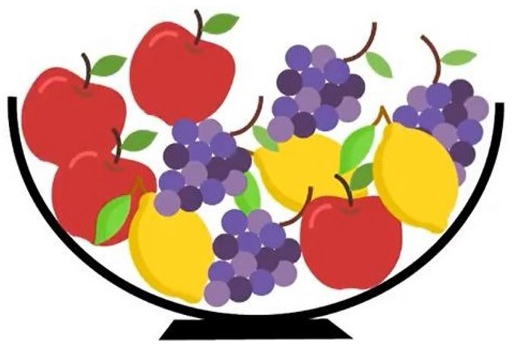

Строим три решающих дерева, которые делают предсказания следующим образом:

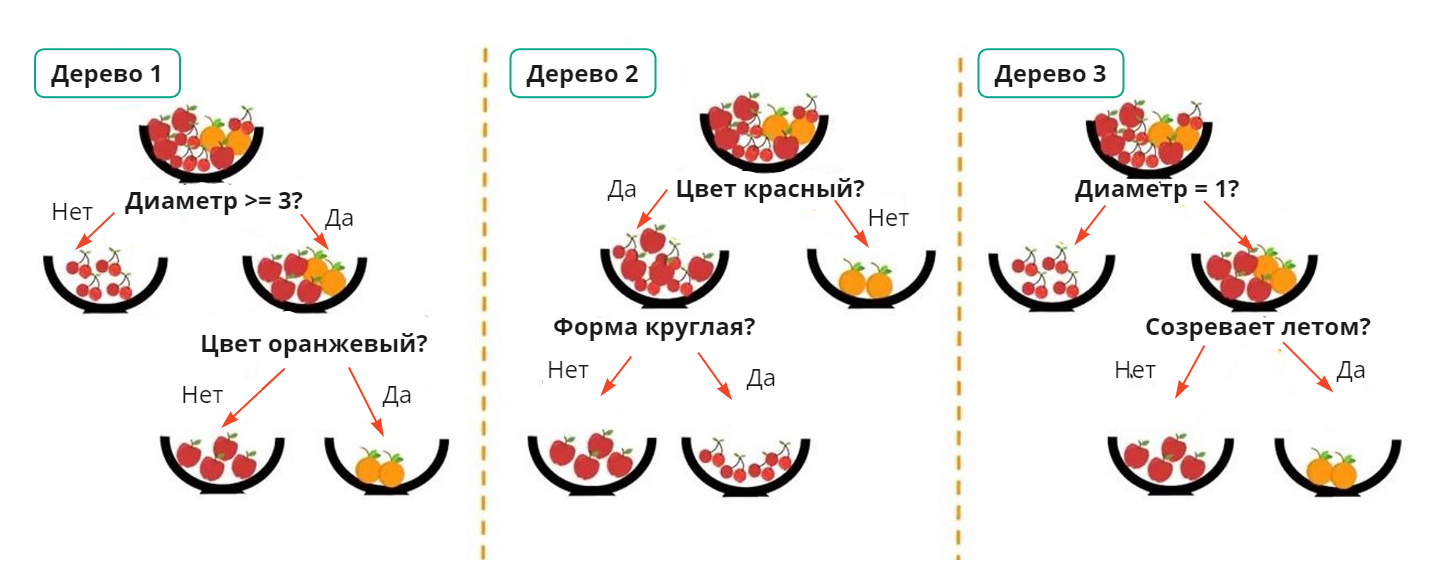

Появляется новый фрукт, про который мы пока ничего не знаем, кроме его признаков:

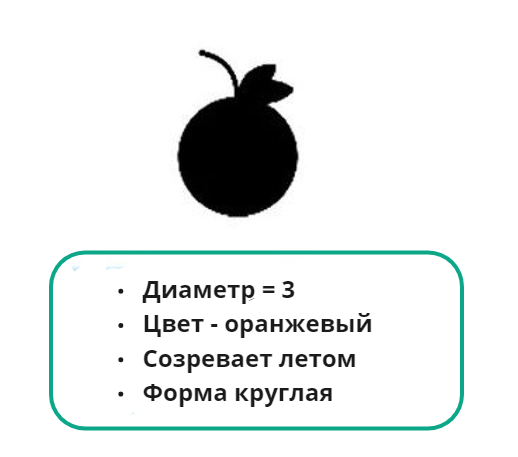

Наш случайный лес, состоящий из трёх деревьев, будет классифицировать этот фрукт следующим образом:

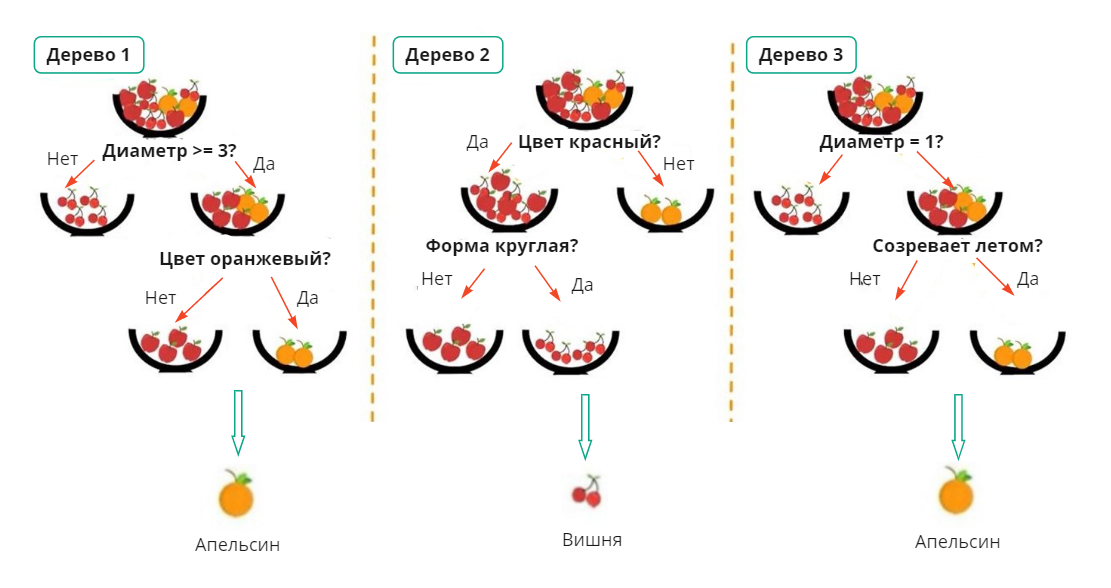

Мы видим, что два дерева голосуют за то, что это апельсин, и одно дерево голосует за вишню. Тогда большинством голосов мы решаем, что это апельсин.

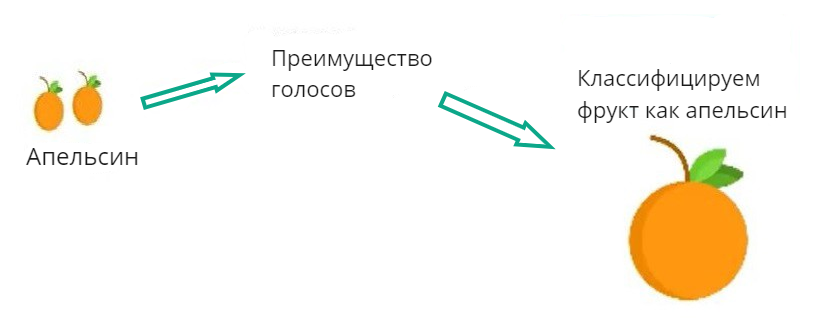

Вот и всё, мы решили задачу классификации с помощью случайного леса.

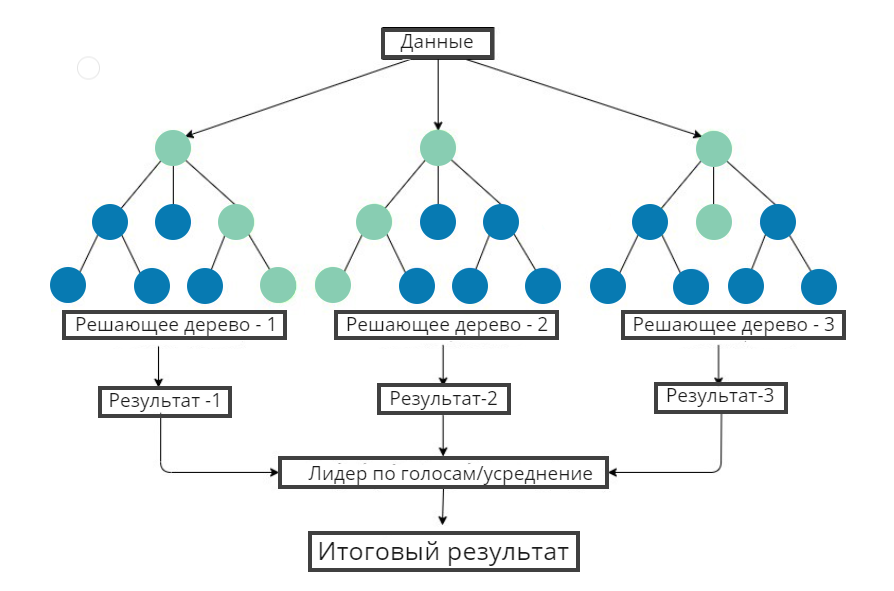

Есть какое-то количество решающих деревьев, каждое из которых мы обучаем на некоторой подвыборке из данных. Получив вердикты от всех моделей, определяем итоговый результат для каждого объекта.

## Для **регрессии** правило формирования итогового результата формулируется следующим образом:

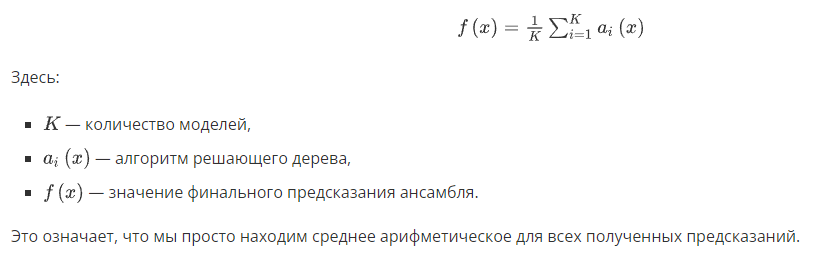

## Правило формирования итогового результата для **классификации**:

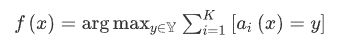

Здесь деревья просто голосуют за некоторый класс, и объекту присваивается метка класса, за который было отдано наибольшее количество голосов.

Давайте рассмотрим алгоритм реализации случайного леса.

## Одно из важных понятий, которое здесь появляется, — это **метод случайных подпространств**, который используется для построения ансамблей моделей.

Кратко опишем его принцип:

1. Отбираем обучающую выборку.
2. Определяем число моделей, которые войдут в ансамбль.
3. Для каждой модели берём не все признаки, а только часть из них и формируем выборку с использованием случайно выбранного набора признаков.
4. Объединяем все результаты и определяем итоговое решение по объектам.

### **Обратите внимание на важную особенность:** здесь выбирается не только обучающая выборка, но ещё и случайная выборка из признаков.

Алгоритм случайного леса в таком контексте реализуется следующим образом:

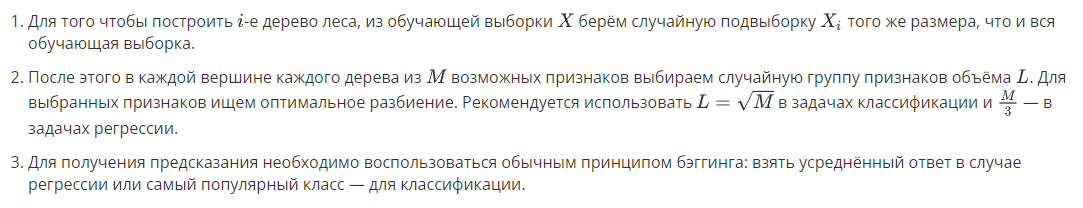

В контексте случайного леса важно обратить внимание на **несколько ключевых аспектов**:

1. Переобучение

Случайный лес может переобучаться, однако это никак не связано с количеством деревьев. Наоборот, с ростом числа деревьев модель становится всё более эффективной в плане корректных прогнозов. На анимации ниже наглядно показано, что случайный лес не переобучается, а совершенствует своё предсказание.

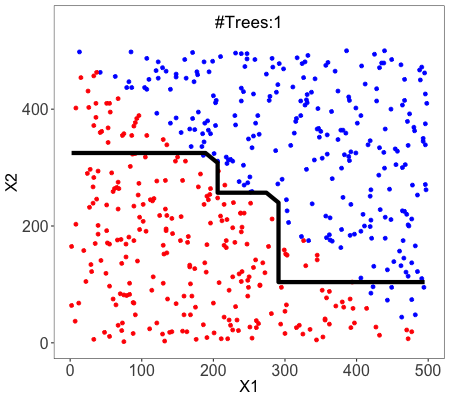

Здесь мы видим пространство признаков с объектами, которые относятся к двум классам (красные точки и синие точки). Мы пытаемся построить разделяющую их поверхность, которая корректируется по ходу увеличения числа деревьев (счётчик количества деревьев расположен сверху).

2. Out-of-Bag Error

## **Ошибка Out-of-Bag** — это способ оценить качество случайного леса.

Давайте разберём, как она вычисляется, на примере.

Предположим, что в нашем случайном лесу пять решающих деревьев, и наша обучающая выборка выглядит следующим образом:

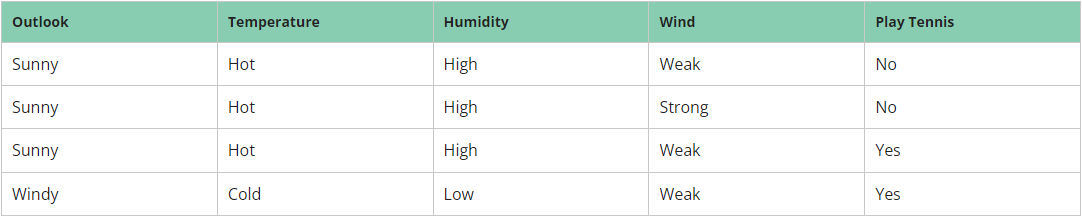

В выборку внесены погодные условия и итоговое решение — подходит ли день для игры в теннис. Итоговое решение при одинаковых погодных условиях может отличаться, так как на него могли повлиять и другие факторы.

Для первого дерева мы делаем такую подвыборку (Bootstrap Sample):

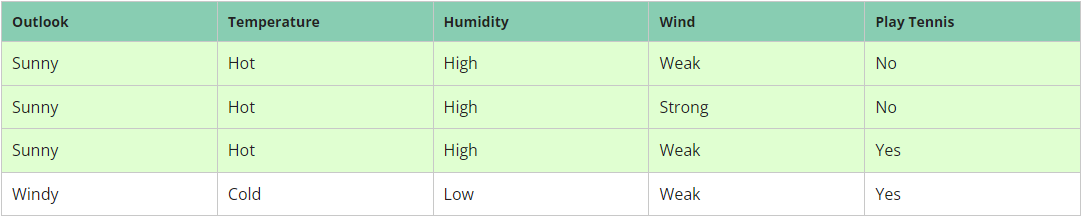

Тогда неучтённая часть выборки носит название подвыборки Out-of-Bag (Out-of-Bag Sample):

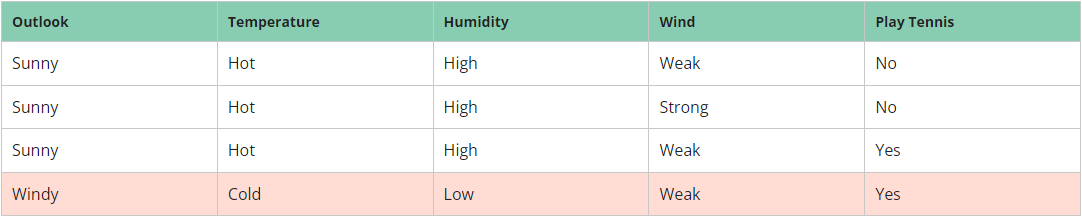

После того как все деревья будут обучены, эта подвыборка будет передана всем деревьям, для которых она не входила в бутстреп-выборку, для формирования прогноза. Допустим, это были деревья под номерами 1, 3 и 5:

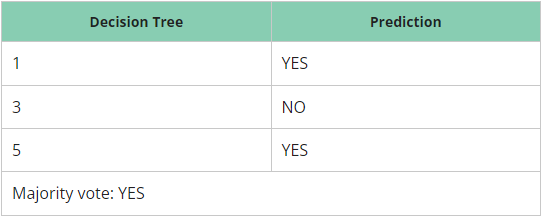

Мы видим, что большинство деревьев проголосовало, что день подходит для игры в теннис, то есть окончательный прогноз для этого объекта — YES. Это совпадает с реальной меткой. Значит, на этом наблюдении алгоритм дал верный прогноз.

Таким же образом все объекты изначальной выборки проходят через все деревья, в подвыборку которых они не попали, и для каждого объекта осуществляется предсказание.

Интересно, что можно доказать, что такие объекты составляют примерно 36.8 % от объёма подвыборки, то есть каждое дерево обучается на подвыборке, в которой в среднем 63.2 % уникальных наблюдений.

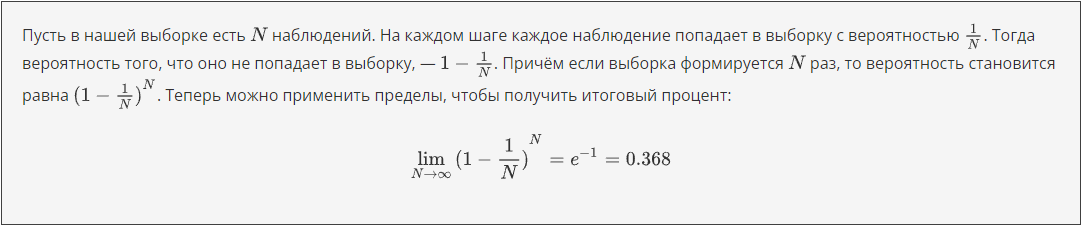

Примечание. Данный переход напрямую следует из второго замечательного предела. К сожалению, эта часть математического анализа выходит за пределы нашего курса, однако если вам интересно изучить её подробнее, рекомендуем ознакомиться с этим материалом.

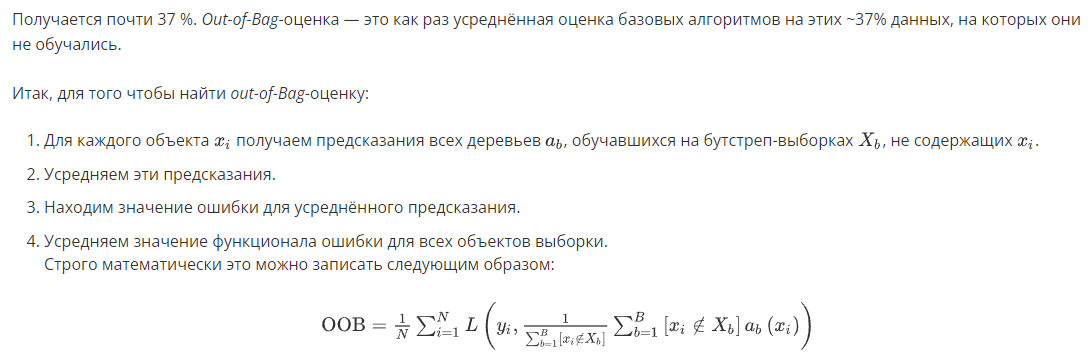

3. Значимость признаков

Разумеется, нам всегда интересно узнать, какие признаки сильнее всего влияют на результат. Случайный лес даёт нам такую возможность. Посмотрим на схематичное изображение решающего дерева:

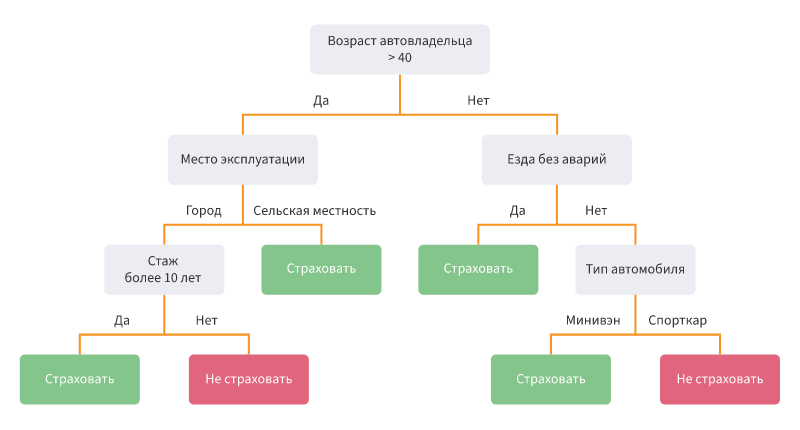

Мы видим, что признак «возраст автовладельца > 40 лет» важнее, чем, например, тип автомобиля. Нам хотелось бы не только узнать самый важный признак, но и в целом проранжировать все признаки модели.

В случайном лесе мы строим много деревьев, и чем в среднем выше какой-то признак находится в деревьях, тем он важнее. О том, как это вычислить программно, мы узнаем в следующем юните.

4. Оценка эффективности

В предыдущем модуле мы разобрали решающие деревья, а в этом — бэггинг и случайный лес. Давайте попробуем сравнить эти алгоритмы и понять, какой из них является более эффективным и даёт бóльшую прогностическую точность.

Реализуем три варианта моделей для случайно сгенерированных данных:

+ решающее дерево c глубиной 15;
+ бэггинг с десятью решающими деревьями:
 + по одному — глубины 11, 14, 15, 16,
 + четыре — глубины 13,
 + два — глубины 12;
+ случайный лес с десятью решающими деревьями:
 + по одному — глубины 12, 18,
 + два — глубины 16,
 + шесть — глубины 13.

Попробуем оценить качество в каждом случае. Результаты представлены на графиках ниже.

**Примечание:**

+ **Синей линией** показаны истинные значения для выборки.
+ Точками, которые соединены линиями разных цветов, обозначены предсказания соответствующих моделей: **зелёная линия** — для решающего дерева, **жёлтая** — для бэггинга, **красная** — для случайного леса.

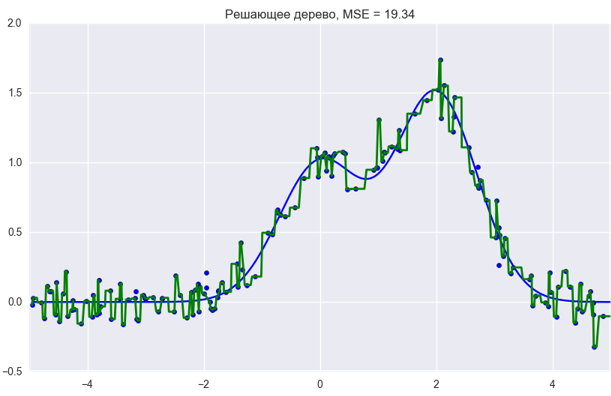
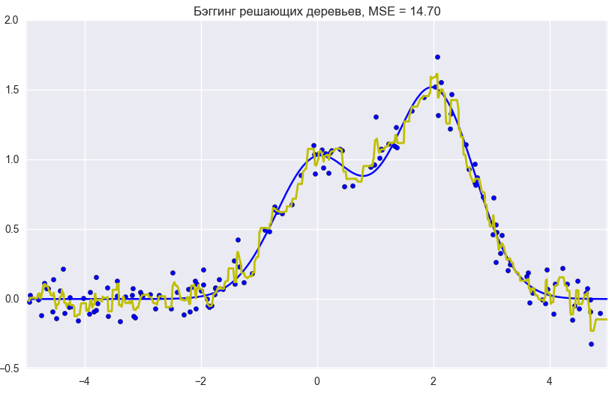
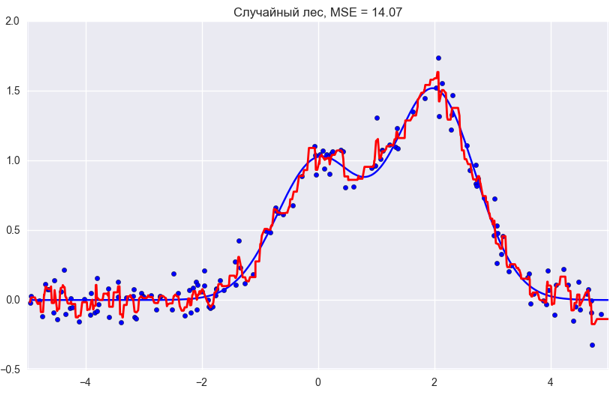

Из графиков можно увидеть, что ошибка для алгоритма бэггинга над решающими деревьями заметно меньше, чем ошибка для одного случайного дерева. Численные результаты подтверждают это. Случайный лес в данном случае обгоняет по эффективности бэггинг над решающими деревьями (однако это не является правилом, и с другими данными может получиться другой результат).


### Итак, мы разобрали все основные моменты, которые касаются случайного леса. Нам осталось лишь закрепить полученные знания на практике — этим мы займёмся уже совсем скоро. А пока давайте обобщим плюсы и минусы данного алгоритма, которые были упомянуты в этом юните и ранее.

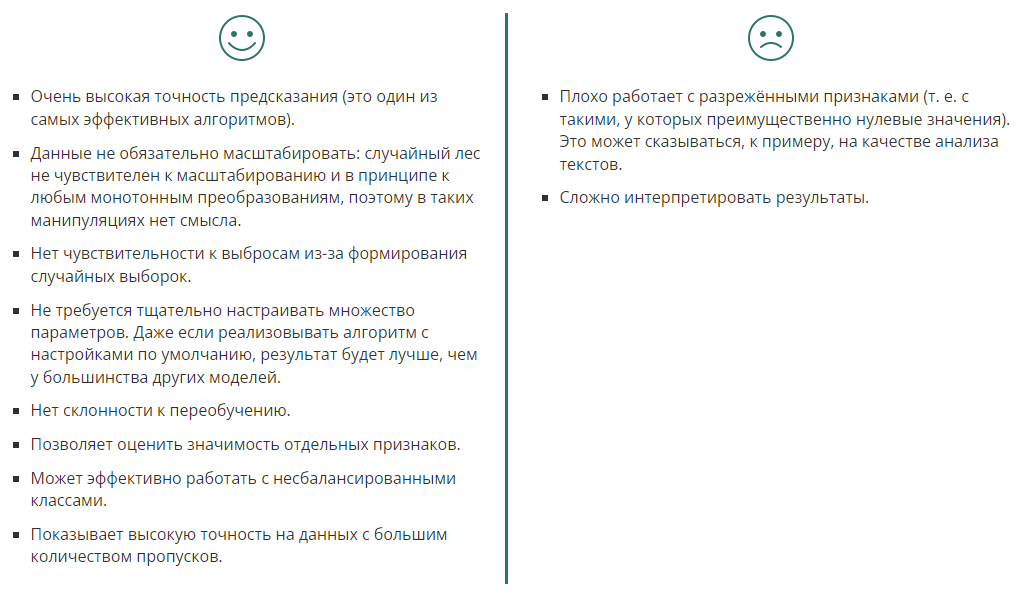

Теперь вы понимаете принцип реализации случайного леса и готовы переходить к практической части. Но для начала давайте немного повторим и закрепим теорию.

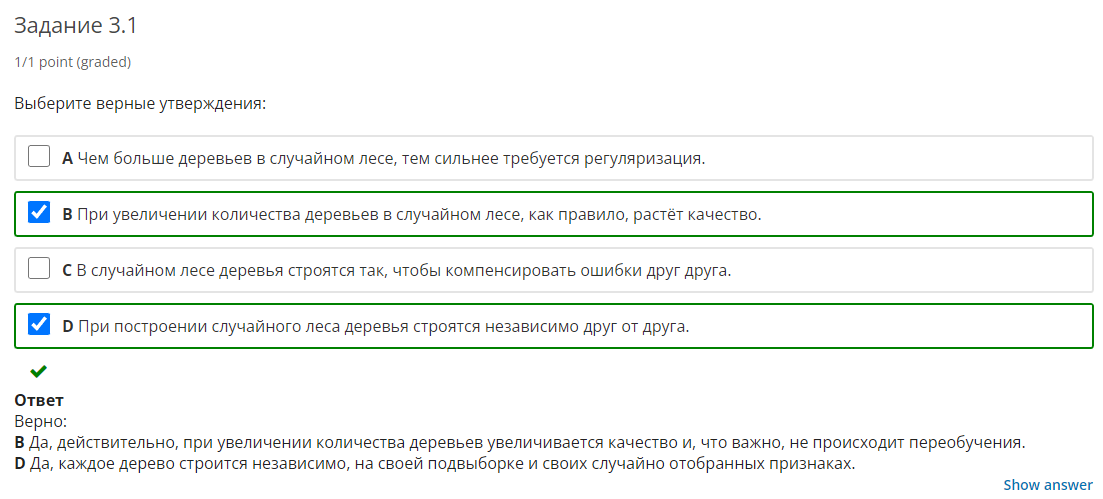

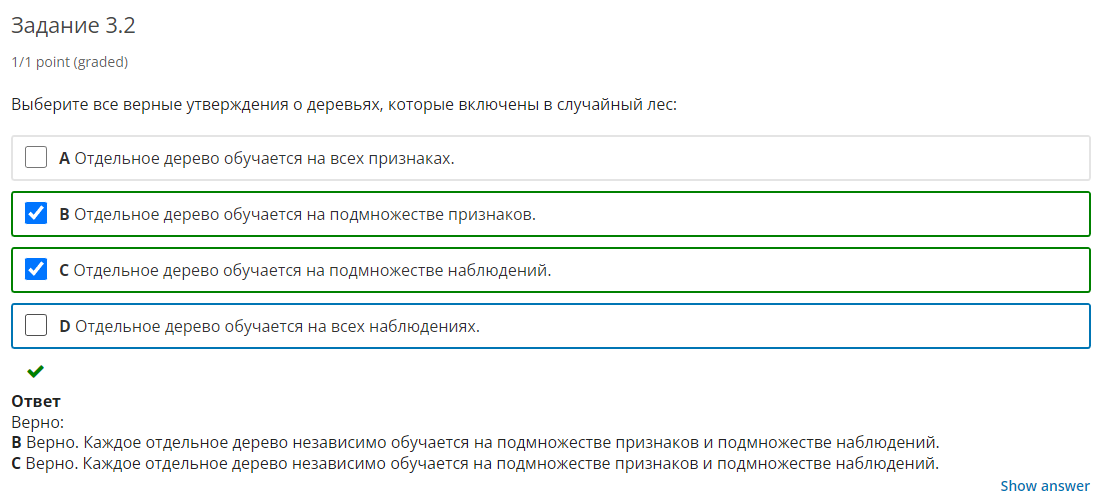

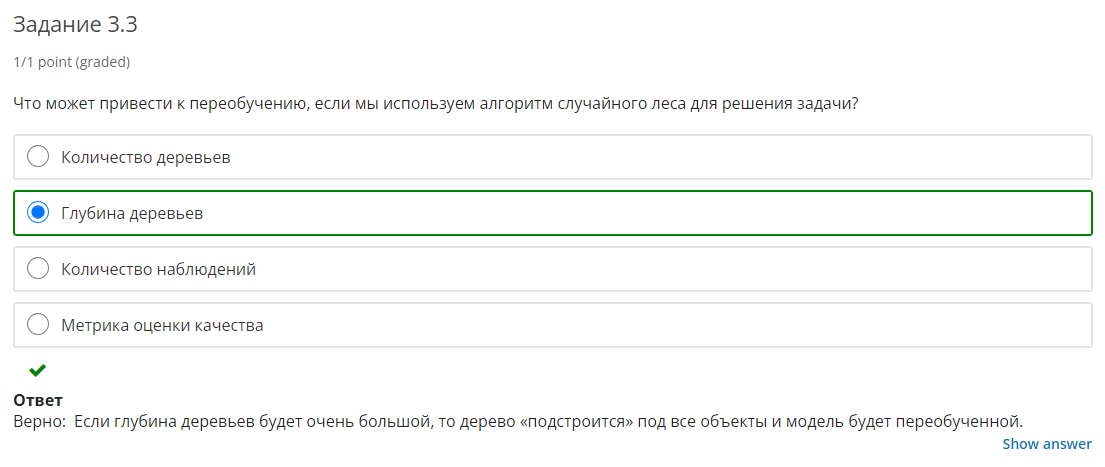

Более подробно рассматривать практическую сторону реализации случайного леса и варьировать различные параметры для получения наилучшего результата мы будем в следующем юните. Но давайте решим небольшую задачу уже сейчас. Все функции из неё вы уже использовали ранее, так что это отличный повод вспомнить их или поработать с документацией.

Мы будем анализировать набор данных Boston Houses, в котором объектами являются районы города, признаками — некие социальные и географические характеристики района, а целевой переменной — медианная стоимость домов в районе. Таким образом, мы будем решать задачу регрессии.

Как и в предыдущем практическом задании, весь код, который мы напишем, можно применить к любым данным.

Описание признаков:

+ crim_rate — уровень преступности в районе;
+ zn — доля участков площадью более 25 000 кв. футов;
+ business — уровень развитости бизнеса в районе;
+ river — наличие реки в районе;
+ nit_oxiden — концентрация оксидов азота в воздухе;
+ rooms — среднее число комнат в домах района;
+ age — процент домов, построенных до 1940 года;
+ dist — расстояние до центров занятости;
+ highways_index — индекс доступности крупных дорог;
+ tax — средняя ставка налога на имущество;
+ pup_per_teac — среднее число учеников на одного учителя;
+ lower — процент малообеспеченного населения в районе;
+ target — медианная стоимость домов в районе (целевая переменная).

## Задание 3.4

1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.

Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя.

2. Обучите линейную регрессию с параметрами по умолчанию.

В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

3. Обучите решающее дерево с параметрами по умолчанию и аргspan class="code-blue">random_state = 13.

Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?

4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13.

В качестве ответа введите наименьшую полученную ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [20]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [15]:
data = pd.read_csv('boston.csv', decimal=",")
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [16]:
X = data.drop(['target'], axis= 1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)
y_train.mean()

22.77316384180791

In [19]:
from sklearn.metrics import mean_absolute_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
preds_train = model_lr.predict(X_train)
preds_test = model_lr.predict(X_test)
print(mean_absolute_error(y_test, preds_test))

3.722279395856134


In [21]:
model = DecisionTreeRegressor(random_state=13)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print(mean_absolute_error(y_train, preds_train))
print(mean_absolute_error(y_test, preds_test))

0.0
2.8388157894736845


In [23]:
for n in [3, 10, 100, 500]:
    model = RandomForestRegressor(n_estimators=n, random_state = 13)
    model.fit(X_train, y_train)
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    print(mean_absolute_error(y_test, preds_test))

2.9328947368421057
2.466315789473684
2.2559736842105265
2.2365657894736892
